# Predicción de Presencia de Endermedad Cardíaca con Regresión Logística

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
# Se importan las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Librerías para modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Se carga el dataset
data = pd.read_csv('./heart_cleveland.csv')

In [8]:
# Se realiza lectura de datos para el análisis exploratorio
data.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [9]:
# Descripción de los datos
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes y atípicos')

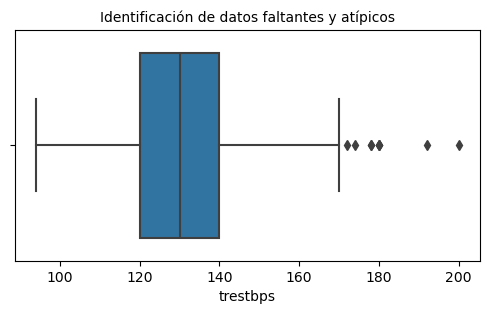

In [52]:
# Identificación de datos faltantes y atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['trestbps'])
plt.title('Identificación de datos faltantes y atípicos', fontsize=10)

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

Text(0.5, 1.0, 'Identificación de datos atípicos')

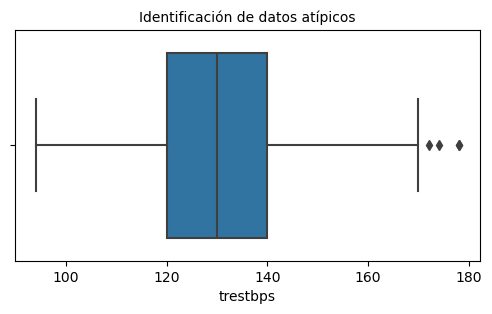

In [67]:
# Revisión de datos atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['trestbps'])
plt.title('Identificación de datos atípicos', fontsize=10)

In [63]:
# Conteo de datos atípicos
nivel_min = 90
nivel_max = 180
total_atipicos = ((data['trestbps']<nivel_min)|(data['trestbps']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atipicos))

El total de datos atípicos es 2


In [64]:
# Filtrar datos atípicos
data=data[(data['trestbps']<nivel_max)&(data['trestbps']>nivel_min)]

In [65]:
# Se valida si se removieron los datos atípicos
total_atipicos=((data['trestbps']<nivel_min)|(data['trestbps']>nivel_max)).sum()
print("El total de datos atípicos es {}".format(total_atipicos))

El total de datos atípicos es 0


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

##### Característica de interés:
- Condition: si la persona tiene enfermedad cardíaca o no (0 = no tiene - 1 = si tiene)
- Predecir si una persona puede tener diabetes

In [73]:
# Total de personas con enfermedad cardíaca

data['condition'].value_counts()

condition
0    158
1    133
Name: count, dtype: int64

In [74]:
data[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo...

In [75]:
# Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información de entrenamiento

X = data.drop('condition',axis=1)
Y = data['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [76]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
74    70    1   2       160   269    0        0      112      1      2.9   
130   48    0   2       130   275    0        0      139      0      0.2   
177   64    1   3       128   263    0        0      105      1      0.2   
199   60    1   3       145   282    0        2      142      1      2.8   
58    45    1   1       128   308    0        2      170      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
169   66    1   3       160   228    0        2      138      0      2.3   
170   65    0   3       150   225    0        2      114      0      1.0   
80    67    1   2       152   212    0        2      150      0      0.8   
237   56    1   3       132   184    0        2      105      1      2.1   
233   57    1   3       132   207    0        0      168      1      0.0   

     slope  ca  thal  
74       1   1     2  
130      0   0     0  
177      1   1    

In [77]:
print (Y_train)

74     1
130    0
177    0
199    1
58     0
      ..
169    0
170    1
80     1
237    1
233    0
Name: condition, Length: 218, dtype: int64


### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [78]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)

# Crea el modelo de predicción
prediccion = modelo_regresion.predict(X_test)

In [79]:
print (Y_train)

74     1
130    0
177    0
199    1
58     0
      ..
169    0
170    1
80     1
237    1
233    0
Name: condition, Length: 218, dtype: int64


In [80]:
print (prediccion)

[0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0
 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1]


### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [81]:
# Desempeño del modelo de regresión

print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.90      0.85      0.88        33

    accuracy                           0.89        73
   macro avg       0.89      0.89      0.89        73
weighted avg       0.89      0.89      0.89        73



### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

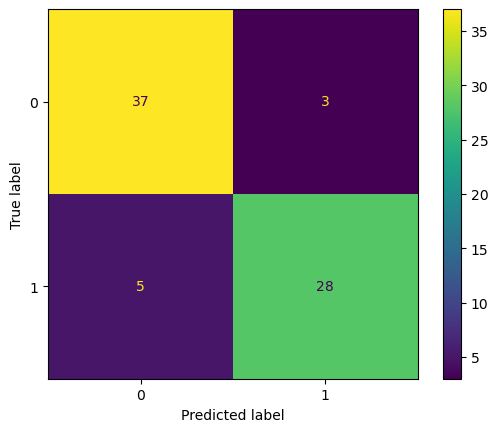

In [82]:
# Matrix de confusión

cm=confusion_matrix(Y_test, prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

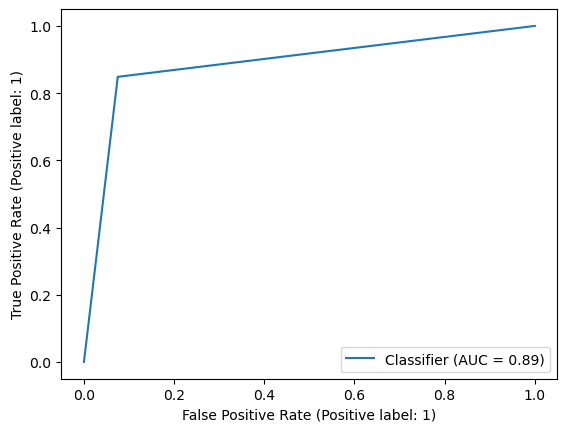

In [83]:
# Curva de precisión del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show()